Cardiovascular diseases

In [1]:
%%capture
!pip install --upgrade --upgrade-strategy eager --user numpy pandas matplotlib seaborn scikit-learn plotly

In [2]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from collections import Counter
import math
import sys

In [3]:
heart = pd.read_csv('../Draft/heart.csv', index_col=None, na_values=['NA'],)

In [4]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
string_col = heart.select_dtypes(include="object").columns
heart[string_col]=heart[string_col].astype("string")
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
string_col=heart.select_dtypes("string").columns.to_list()
num_col=heart.columns.to_list()
for col in string_col:
    num_col.remove(col)
px.imshow(heart[num_col].corr(),title="Correlation Plot")

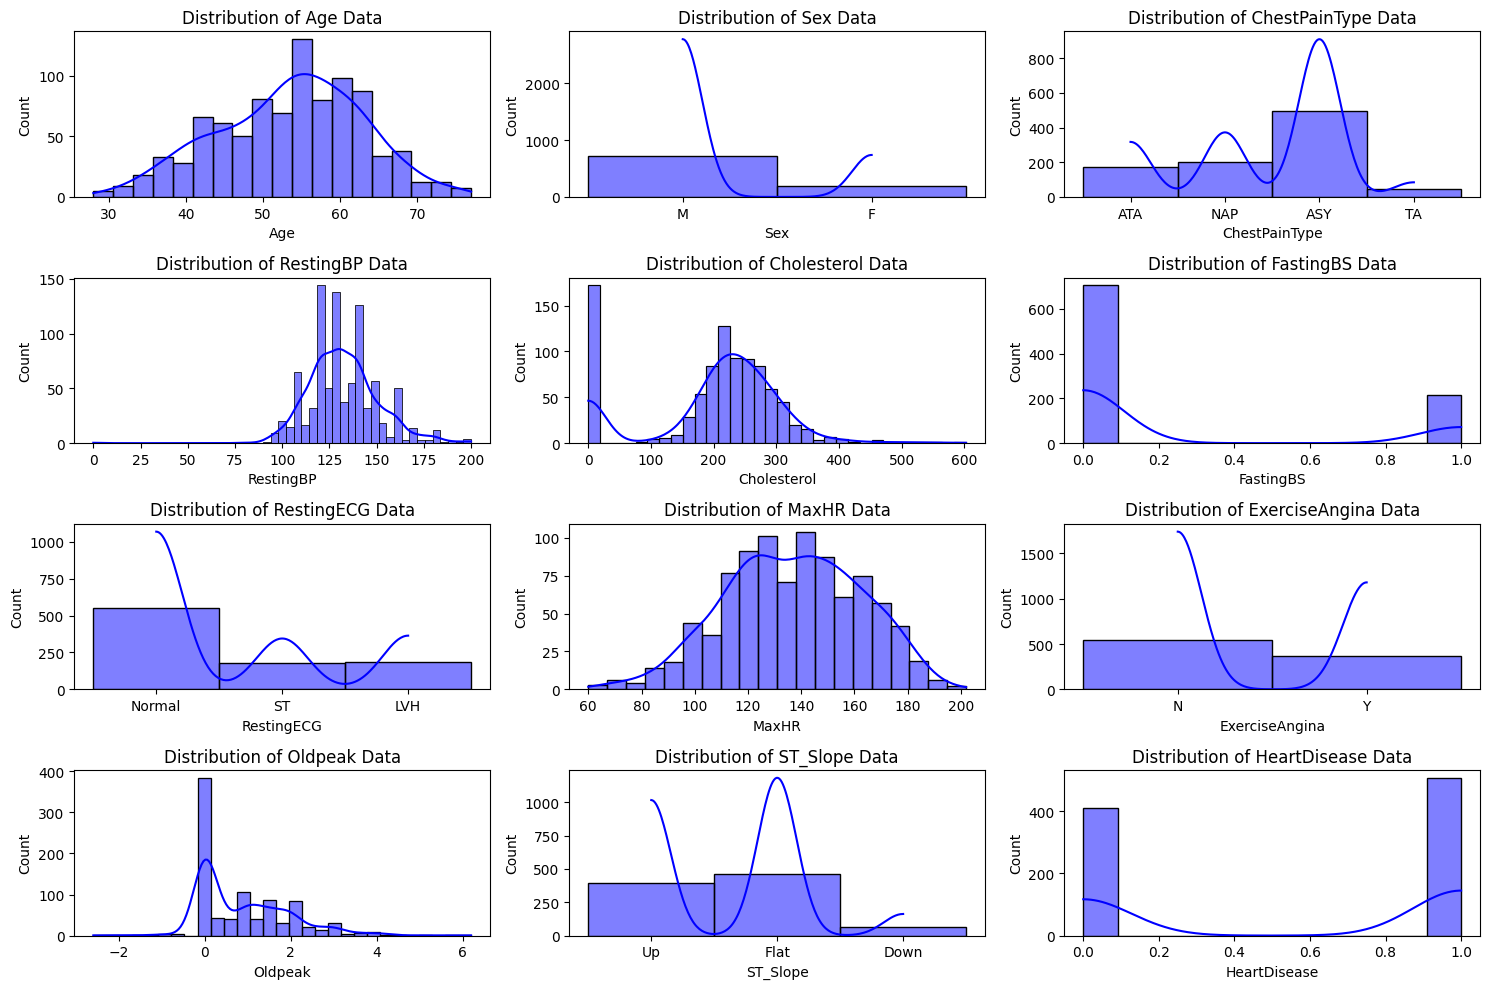

In [7]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart[col],kde=True, color="blue")
    plt.tight_layout()
    plt.plot()

In [8]:
fig = px.box(heart,y="Age",x="HeartDisease",title=f"Distrubution of Age", color="HeartDisease")
fig.show()

In [9]:
fig = px.box(heart,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP", color = "HeartDisease")
fig.show()

In [10]:
heart['Cholesterol'] = heart['Cholesterol'].replace(0, 'NaN')
median_value = heart['Cholesterol'].median()
heart['Cholesterol'] = heart['Cholesterol'].replace('NaN', median_value)
heart['Cholesterol'].describe()
fig = px.box(heart,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol", color = "HeartDisease")
fig.show()

In [11]:
fig = px.box(heart,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR", color="HeartDisease")
fig.show()

In [12]:
fig = px.box(heart,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak", color="HeartDisease")
fig.show()

In [13]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
target = heart.iloc[:, -1]   # Last column as the target variable 
feature = heart.iloc[:, :-1]  # All columns except the last one as the features 

In [15]:
sex_status = {"M" : 1, "F" : 0}
feature.Sex= [sex_status[item] for item in feature.Sex]

print(Counter(feature.Sex).keys()) 
print(Counter(feature.Sex).values())

dict_keys([1, 0])
dict_values([725, 193])


In [16]:
exercise = {"Y" : 1, "N" : 0}
feature.ExerciseAngina = [exercise[item] for item in feature.ExerciseAngina]

print(Counter(feature.ExerciseAngina).keys()) 
print(Counter(feature.ExerciseAngina).values())

dict_keys([0, 1])
dict_values([547, 371])


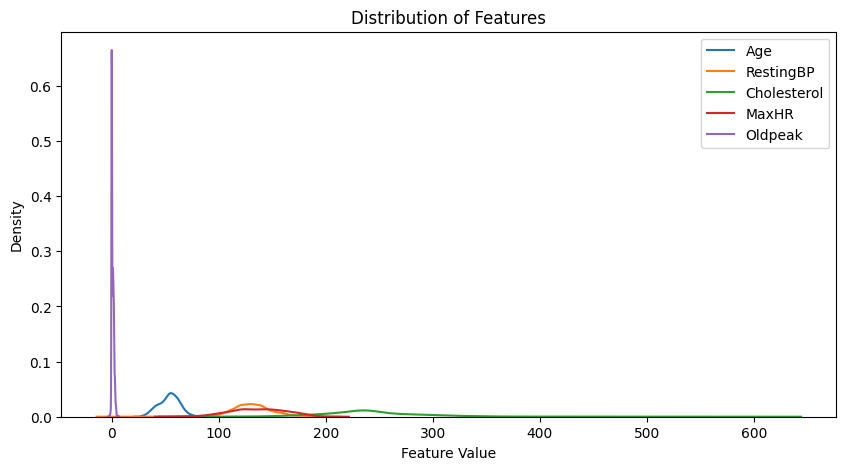

In [17]:
plt.figure(figsize=(10, 5))
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for column in columns:
    sns.kdeplot(feature[column], label=column)

plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.title('Distribution of Features')
plt.legend()
plt.show()

In [18]:
minmax_scaler = preprocessing.MinMaxScaler()

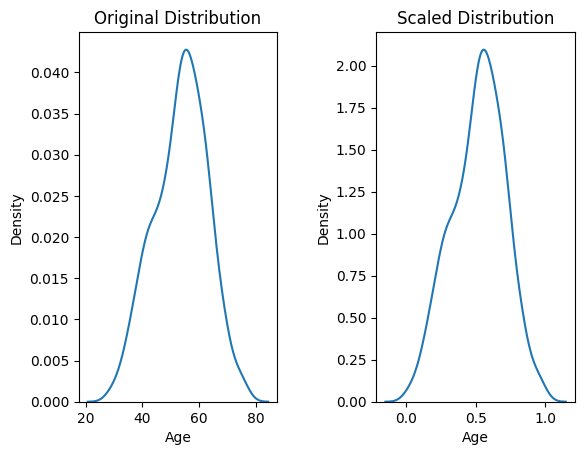

In [19]:
fig, (original, scaled) = plt.subplots(1, 2)
sns.kdeplot(feature['Age'], label='Age', ax=original)
original.set_title('Original Distribution')

# Scale the Age feature
feature['Age'] = minmax_scaler.fit_transform(feature[['Age']])

# Plot the scaled distribution of the Age feature
sns.kdeplot(feature['Age'], label='Age', ax=scaled)
scaled.set_title('Scaled Distribution')

plt.subplots_adjust(wspace=0.5)
plt.show()

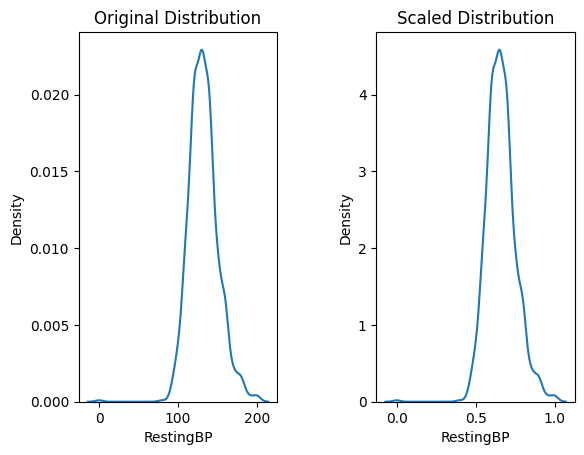

In [20]:
fig, (original, scaled) = plt.subplots(1, 2)
sns.kdeplot(feature['RestingBP'], label='RestingBP', ax=original)
original.set_title('Original Distribution')

# Scale the RestingBP feature
feature['RestingBP'] = minmax_scaler.fit_transform(feature[['RestingBP']])

# Plot the scaled distribution of the RestingBP feature
sns.kdeplot(feature['RestingBP'], label='RestingBP', ax=scaled)
scaled.set_title('Scaled Distribution')

plt.subplots_adjust(wspace=0.5)
plt.show()

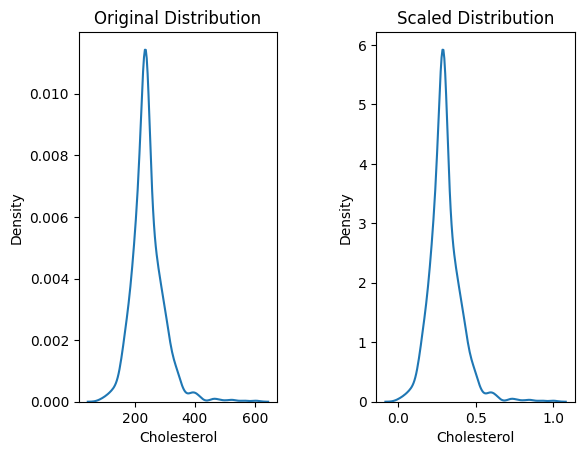

In [21]:
fig, (original, scaled) = plt.subplots(1, 2)
sns.kdeplot(feature['Cholesterol'], label='Cholesterol', ax=original)
original.set_title('Original Distribution')

# Scale the Cholesterol feature
feature['Cholesterol'] = minmax_scaler.fit_transform(feature[['Cholesterol']])

# Plot the scaled distribution of the Cholesterol feature
sns.kdeplot(feature['Cholesterol'], label='Cholesterol', ax=scaled)
scaled.set_title('Scaled Distribution')

plt.subplots_adjust(wspace=0.5)
plt.show()

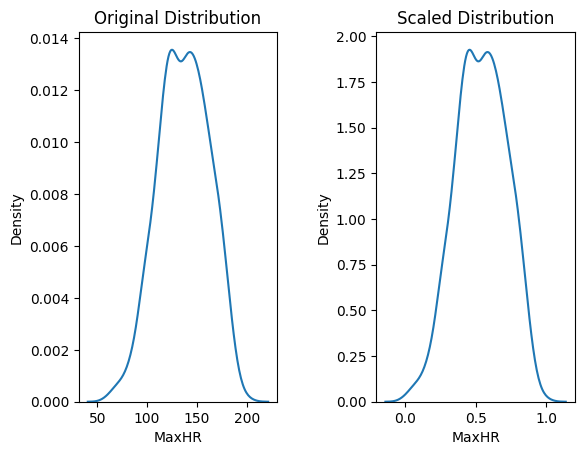

In [22]:
fig, (original, scaled) = plt.subplots(1, 2)
sns.kdeplot(feature['MaxHR'], label='MaxHR', ax=original)
original.set_title('Original Distribution')

# Scale the MaxHR feature
feature['MaxHR'] = minmax_scaler.fit_transform(feature[['MaxHR']])

# Plot the scaled distribution of the MaxHR feature
sns.kdeplot(feature['MaxHR'], label='MaxHR', ax=scaled)
scaled.set_title('Scaled Distribution')

plt.subplots_adjust(wspace=0.5)
plt.show()

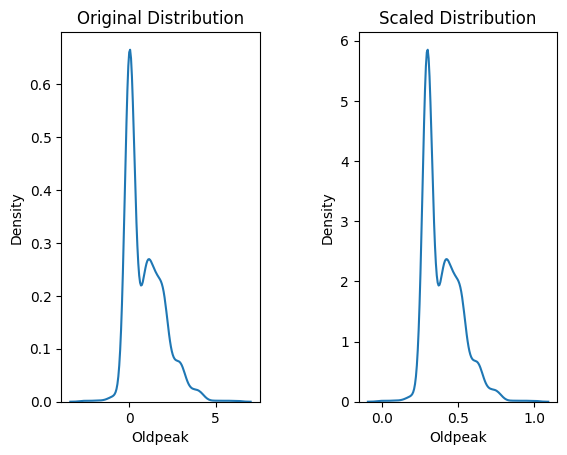

In [23]:
fig, (original, scaled) = plt.subplots(1, 2)
sns.kdeplot(feature['Oldpeak'], label='Oldpeak', ax=original)
original.set_title('Original Distribution')

# Scale the Oldpeak feature
feature['Oldpeak'] = minmax_scaler.fit_transform(feature[['Oldpeak']])

# Plot the scaled distribution of the Oldpeak feature
sns.kdeplot(feature['Oldpeak'], label='Oldpeak', ax=scaled)
scaled.set_title('Scaled Distribution')

plt.subplots_adjust(wspace=0.5)
plt.show()

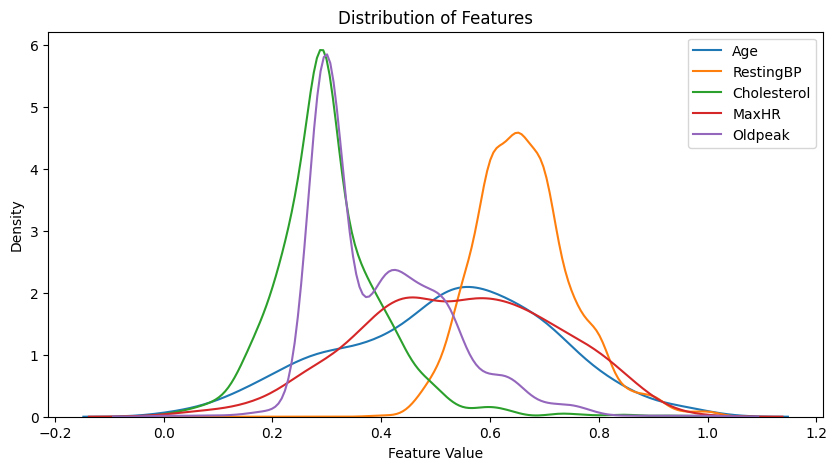

In [24]:
plt.figure(figsize=(10, 5))
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for column in columns:
    sns.kdeplot(feature[column], label=column)

plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.title('Distribution of Features')
plt.legend()
plt.show()

In [25]:
##one hot encoding for chest pain type, fasting blood sugar, resting ecg, st slope
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_name = ['ChestPainType', 'RestingECG', 'ST_Slope']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), column_name)], remainder='passthrough')
feature = np.array(ct.fit_transform(feature))